In [2]:
import casadi as ca
import numpy as np

In [3]:
a = ca.SX.sym('a', 2, 2)
b = ca.SX.sym('b', 2, 2)

pippo = ca.blockcat([[a, b], [ca.transpose(b), a]])

print(pippo)
print(pippo.shape)


[[a_0, a_2, b_0, b_2], 
 [a_1, a_3, b_1, b_3], 
 [b_0, b_1, a_0, a_2], 
 [b_2, b_3, a_1, a_3]]
(4, 4)


In [4]:
times = np.array([0.100, 0.297, 0.433, 0.642, 0.767, 1.0])

durations = np.diff(times)

durations = np.insert(durations, 0, times[0])

# print(durations)

pippo = [2]
print(pippo[0])

2


In [4]:
from scipy.linalg import solve_continuous_are

A = np.array([[-1, 0], [1, 2]])
B = np.array([[1], [1]])

Q = 1000 * np.eye(2)
R = 1

P = solve_continuous_are(A, B, Q, R)

print(P)



[[ 250.25       -249.25      ]
 [-249.25        295.98253849]]


(1960, 1)


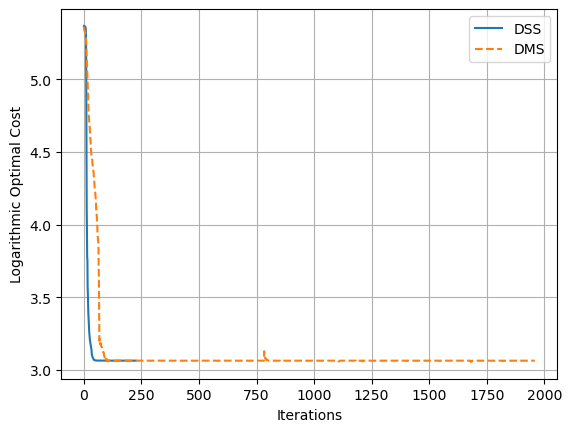

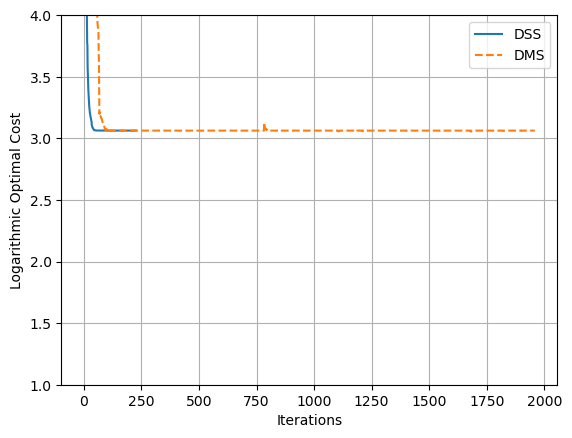

In [6]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from ipywidgets import interactive

# Load data from a .mat file
data = scipy.io.loadmat('results.mat')

# Extract the relevant variables
optimal_costs = data['optimal_costs'][0] 
iter_array = data['iter_array'][0]  # Extract the array from the nested structure

print(optimal_costs[1].shape)

# Plot the optimal costs function value
plt.figure()

plt.plot(np.log10(optimal_costs[0].flatten()), label='DSS', linestyle="-")
plt.plot(np.log10(optimal_costs[1].flatten()), label='DMS', linestyle="--")
plt.xlabel('Iterations')
plt.ylabel('Logarithmic Optimal Cost')
plt.grid()
plt.legend()

plt.figure()
plt.plot(np.log10(optimal_costs[0].flatten()), label='DSS', linestyle="-")
plt.plot(np.log10(optimal_costs[1].flatten()), label='DMS', linestyle="--")
plt.xlabel('Iterations')
plt.ylabel('Logarithmic Optimal Cost')
plt.ylim((1, 4))
plt.grid()
plt.legend()

plt.show()